# Notes from Dr. Sharpnack on how to improve:

- Lowess residuals seems to be an appropriate method to describe trends. No need to impose stationarity, fit an ARMA model, etc.
    - However, can try to display information more conveniently. Color by time or by temperature? May be useful to construct an interactive visualization.
- Migrate notebooks to HTML for any sort of display on a website.
- Emphasize difference in climate change and global warming in analysis, add "gore lines" to all plots (or option to add to all plots)
- Move cells with acutal data extraction to a separate .py file
    - Load sqlite database
- Consider the structure def __name__ = "__main__" to load files when running the script separately from data collection
    - Make runs scripts in order
- Switch radius to area in the Author vs. Comment number plot
    - Highlight area of the dot
    - Add consistent redundancy (if needed) to interpretation
- Better corpus comparisons
    - Try comparing words or phrases (n-grams) from this corpus with another corpus
    - Could be assembled either from the NLTK corpus, which will contain general word frequencies of the English language
    - Another attempt might be to look at a randomly assembled corpus of other reddit comments.
        - Could use the random function in bigquery to assemble a dataset containing a large number of submissions (subsetting to remove those submissions that belong to non-NSFW subreddits).
        - Alternatively, could use a corpus like Reuters to 
- Consider submitting to different conferences:
    - KDD (Best? Applications are due in early spring of each year for a domestic conference in the summer)
    - ICDM

# Introduction

For many, Donald Trump's Twitter activity is a constant source of fascination. Whether you see this as evidence of his public communications genius or tempermental instability, @RealDonaldTrump's unfiltered stream of commentary on current events presents a rare opportunity to examine the thoughts and behavior of our country's highest elected official.

Trump's Twitter is already under intense scrutiny; an upcoming Supreme Court decision on DACA, for example, may rest on whether Tweets are an official mouthpiece of the presidency. However, there appears to be less focus on examining trends of discourse in favor of immediate reactions that dominate news cycles. While gauging President Trump's response to current events is valuable, examining Trump's attention span and use of language over the long-term may yield new insights into the discourse surrounding key issues.

As an environmental scientist, I'm particularly concerned how our President (and by virtue, the rest of the American public) thinks about climate change -- President Trump is a vocal proponent of climate skepticism. While his recent Twitter activity has been focused on more pressing concerns for his administration, climate change is a familiar topic; in the past 6 years, @RealDonaldTrump has expressed his opinion on climate science on less than 145 times.

A closer look at the content of these Tweets suggests two key trends:

__1. President Trump likes to draw attention to climate change when weather is cold.__

__2. President Trump prefers to use the term "global warming" over "climate change".__ 

### Some Examples:

In [1]:
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str
    def _repr_html_(self):
        return self.embed_str
    
address = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">
The concept of global warming was created by and for the Chinese in order to make U.S. 
manufacturing non-competitive.</p>&mdash; Donald J. Trump (@realDonaldTrump) 
<a href="https://twitter.com/realDonaldTrump/status/265895292191248385?ref_src=twsrc%5Etfw">November 6, 2012</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")

Tweet(address)

In [2]:
address = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">
In the East, it could be the COLDEST New Year’s Eve on record. 
Perhaps we could use a little bit of that good old Global Warming that our Country, 
but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up!
</p>&mdash; Donald J. Trump (@realDonaldTrump) 
<a href="https://twitter.com/realDonaldTrump/status/946531657229701120?ref_src=twsrc%5Etfw">
December 29, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")

Tweet(address)

The scientific accuracy of these claims aside, this behavior highlights the difficulty in discussing climate change with an uninformed audience.

In contrast to the immediate domestic concerns that are the foundation of Trump's poltical platform, climate change (like many ecological stressors) operates slowly and consistently - our frame of reference tends to shift faster than the environment. If it's difficult for a non-expert to make meaningful observations without looking at recorded data, communicating the significance of this phenomena can be nearly impossible.

This __recency bias__, also known as "ecological amnesia" or the "continuity effect", is illustrated by the evidence Trump uses to support his arguments. Like many of us, President Trump appears to place greater emphasis on recent fluctuations than long-term trends. Seasonal fluctuations in weather are not a great predictor of broader climatic patterns, but we zero in on events that *feel* out of the ordinary, like a heavy winter snowstorm. 

His of the term "global warming" instead of "climate change" also implies a deliberate choice of __misleading terminology__. While "global warming" is factually correct, science advocates have [cautioned against its use](https://www.nasa.gov/topics/earth/features/climate_by_any_other_name.html). The trend of increasing average global temperatures is just one piece of the effects of climate change, and may poorly reflect shifts in climatic patterns (such as greater frequency of extreme weather events like snowstorms and blizzards) that are relevant to most audiences. After priming readers with the term "global warming", President Trump is able to cast doubt on climate change by highlighting a particularly cold patch of weather in the Northeast US - even when these events are predicted by modern climate science.

__Is this behavior reflective of a more general pattern?__

While @RealDonaldTrump's feed displays some interesting trends, he is also a public figure whose online behavior may not mirror that of a more general user. On the other hand, Trump is a very savvy salesman, and may be tapping into existing 
 


Given these patterns of behavior, I was curious if President Trump's Twitter feed is representative of the discouse surrounding climate science. In this project, I aim to explore the prevalence of these same patterns of interest and word choice. 




# Questions:

### 1. Is public interest in climate change subject to weather-related seasonal variation? 

### 2. Does use of the terms "climate change" and "global warming" correlate with opinions on climate science? 

# Question 1: Public Interest in Climate Change

To gauge public interest in climate science, I used two datasets:

__1. Google Trends:__ Data on the frequency of searches for the terms "climate change" and "global warming" is likely to represent a relatively unbiased, long-term (>10 year) on general public interest in climate science.When accessing this data, I restricted search location to the United States. This data is standardized, such that the maximum frequency of search terms, aggregated in monthly intervals, is expressed as 100.

__2. NOAA Climate Sensor Readings:__ An National Oceanic and Atmospheric Association data product, this dataset contains an average temperature (in farenheit) reading of climate sensors in the continental United States, aggregated in monthly intervals, from the 1970s to the present.

Together, I expect these resources should be able to demonstrate correlations between search frequency and climate patterns.

### Step 1: Reading and Cleaning Datasets

In [3]:
# Calling required libraries
import pandas as pd
import numpy as np
import datetime
import statsmodels
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins

# Setting plot format 
plotly.tools.set_credentials_file(username='ebatzer', api_key='BIJOCGPZqKooZ16thhcw')
%matplotlib inline

# Reading in dataset
gtrends = pd.read_csv("data/googletrends.csv")

# Renaming columns
gtrends.columns = ["month", "climate change", "global warming"]

# Converting numeric "month" to datetime
gtrends["month"] = gtrends["month"] + "/01"
gtrends["date_num"] = pd.to_datetime(gtrends["month"], yearfirst = True)

# Creating a new variable, total number of searches, again standardized to 100 as maximum
gtrends["total"] = gtrends["climate change"] + gtrends["global warming"]
gtrends["climate change"] = (gtrends["climate change"] / max(gtrends["total"])) * 100
gtrends["global warming"] = (gtrends["global warming"] / max(gtrends["total"])) * 100
gtrends["total"] = (gtrends["total"] / max(gtrends["total"])) * 100

# Adding weather data
weather = pd.read_csv("data/NOAAweatherdata.csv", skiprows = 4) 

# Converting "Month" and "Year" to datetime format
weather["Month"] = weather["Date"] % 100
weather["Year"] = weather["Date"].apply(str).apply(lambda x: x[:4])
weather["Date"] = weather["Year"] + "/" + weather["Month"].apply(str) + "/01"
weather["date_num"] = pd.to_datetime(weather["Date"], yearfirst = True)

# Binds datasets together
gtrends = pd.merge(gtrends, weather, "inner")

# Fit lowess smoothing line
lowess = sm.nonparametric.lowess
ys = lowess(gtrends["total"], pd.to_numeric(gtrends["date_num"]), frac = .3)[:,1]
gtrends['lowess'] = ys

# Compute residuals
gtrends['resid'] = gtrends["total"] - gtrends['lowess']

gtrends.head()

C:\Users\ebatz\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



,month,climate change,global warming,date_num,total,Date,Value,Anomaly,Month,Year,lowess,resid
0,2004/01/01,2.678571,15.178571,2004-01-01,17.857143,2004/1/01,30.34,0.22,1,2004,18.581810,-0.724667
1,2004/02/01,7.142857,19.642857,2004-02-01,26.785714,2004/2/01,33.57,-0.25,2,2004,19.007877,7.777837
2,2004/03/01,5.357143,20.535714,2004-03-01,25.892857,2004/3/01,47.41,5.91,3,2004,19.410915,6.481942
3,2004/04/01,5.357143,17.857143,2004-04-01,23.214286,2004/4/01,52.68,1.63,4,2004,19.846583,3.367703
4,2004/05/01,4.464286,22.321429,2004-05-01,26.785714,2004/5/01,61.92,1.72,5,2004,20.272809,6.512905


### Are there differences in the frequency of search terms for "climate change" and "global warming"?

To visualize this data, I attempted to use the Plotly library. I've had success using Plotly in R, and find the interactive graphs to be helpful in exploring patterns present within data.

This first figure shows a preference (on average) for the search term "global warming" over "climate change". Both large and small fluctuations appear to be present.

- There appears to be a peak in searches for "global warming" in 2007-2008

- Both search terms appear to show regular fluctuations within the overal trend

For some reason, hovertext is still displaying "total" values at all X values. Possible to do with zip() behavior?

In [4]:
# MPLD3 Code Example

fig, ax = plt.subplots(figsize = (14,7))

fig.subplots_adjust(right=0.7)

from matplotlib import cm

df = gtrends[["total", "climate change", "global warming"]]

for key, val in df.iteritems():
    scatter = ax.scatter(val.index, val.values, label=key, s = 50)
    #ax.plot(val.index, val.values, color = "black", alpha = .2, linewidth = .5)

# define interactive legend
handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles, ax.collections), labels)

ax.set_xlabel('Date')
ax.set_ylabel('Google Trends Frequency')
ax.set_title('Interactive legend', size=10)

plt.xticks(np.linspace(0,168,8), 
           np.array(gtrends.month.apply(str))[np.linspace(0,168,8, dtype = "int").tolist()], 
           rotation = 90)

label_list = gtrends.total.append(gtrends["climate change"])
label_list = label_list.append(gtrends["global warming"]).tolist()
label_list = [round(i) for i in label_list]

date_list = gtrends.month.tolist() * 3
labeldf = pd.DataFrame(label_list, date_list)

labels = np.array(['Freq: {0} | Date: {1}'.format(i[1][0], i[0]) for i in labeldf.iterrows()])
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)

for collections, labels_chunk in zip(ax.collections, np.split(labels, 3)):
    tooltip = mpld3.plugins.PointHTMLTooltip(collections, labels=labels_chunk)
    mpld3.plugins.connect(fig, tooltip)

mpld3.plugins.connect(fig, interactive_legend)

mpld3.display()

### Does variation in search frequency correlate with seasonal temperature trends?

To depict this information graphically, I first combined both search terms together to produce a "total" interest value, then fitted a LOWESS smoothing line to the data. Using the "viridis" colormap, I then colored datapoints by their respective mean temperature in the NOAA dataset.

In this qualitative assessment, it's clear that regular seasonal fluctuations within the overall trend of Google search frequency appear to correlate with temperature patterns; __searches peak seasonally in cold weather, and decrease when weather is warm.__


A secondary assessment of the same data presented above is to look at residuals associated with our LOWESS smoothing line. While a more complex time-series analysis may be more appropriate, we can still get a rough sense of these seasonal deviations.

This figure confirms the assessment above, in which seasonal temperatures are correlated with search frequency. Interestingly, it appears that the strongest pattern is a decrease in searches in warm weather (negative residuals), rather than an increase in frqeuency during cold weather.

In [6]:
# MPLD3 Code Example

fig, ax = plt.subplots(1, 3, sharey = False, sharex = False, figsize = (14,7))
fig.subplots_adjust(wspace=0.5)

from matplotlib import cm
colors = [ cm.viridis(x) for x in gtrends["Value"] / max(gtrends["Value"])]

df = gtrends

from matplotlib import dates

d_num = dates.date2num(df["date_num"].tolist())

points = ax[0].scatter(d_num, df["total"], color = colors, s = 50)
ax[0].plot(d_num, df["lowess"], linewidth = 2, color = "black")
points = ax[1].scatter(d_num, df["resid"], color = colors, s = 50)
ax[1].plot(d_num, np.repeat(0, len(df.index)), color = "black")
points = ax[2].scatter(df["Value"], df["resid"], color = colors, s = 50)
ax[2].plot(df.Value, np.repeat(0, len(df.index)), color = "black")

plugins.connect(fig, plugins.LinkedBrush(points))

ax[0].set_xlabel('Date')
ax[0].set_ylabel('Google Trends Frequency')
ax[0].set_title('Search Frequency over Time', size=10)
plt.gcf().autofmt_xdate()

ax[1].set_xlabel('Date')
ax[1].set_ylabel('LOESS Residuals')
ax[1].set_title('Residuals over Time', size=10)

ax[2].set_xlabel('Mean Monthly Temperature (F)')
ax[2].set_ylabel('LOESS Residuals')
ax[2].set_title('Residuals vs. Temperature', size=10)

fig.autofmt_xdate()

mpld3.display()

### What happened in 2007?

The above figures demonstrate the potential influence of seasonal climate patterns on yearly fluctuations in Google search activity, but do not explain the considerable peak in 2007-2008. This "bump" in search frequency is quite surprising - I would have assumed that climate science has become more mainstream, and that public interest would be steadily increasing over this interval.

I think the most likely explanation for this peak is what I would call the "Gore effect":

- __May 2006__ - "An Inconvenient Truth" released.
- __February 2007__ - "An Inconvenient Truth" wins Academy Award for best documentary feature. 
- __October 2007__ - Al Gore and the IPCC wins Nobel Peace Prize.

However, it's difficult to test this association quantitatively. There is a near infinite set of other, less-intuitive  explanatory events.


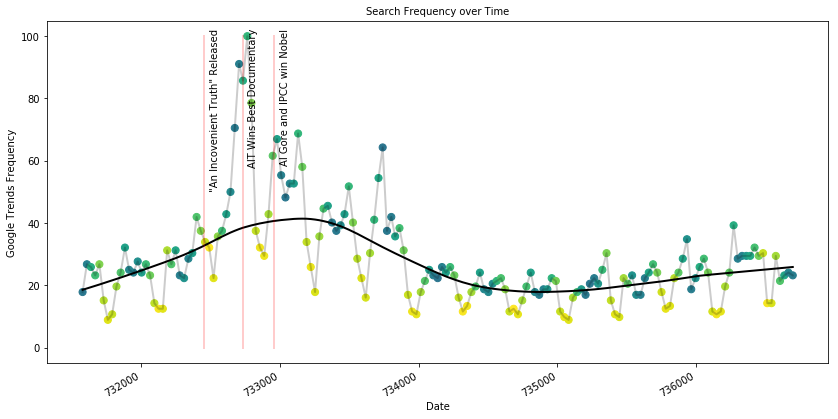

In [7]:
# MPLD3 Code Example

fig, ax = plt.subplots(figsize = (14,7))
fig.subplots_adjust(wspace=0.5)

from matplotlib import cm
colors = [ cm.viridis(x) for x in gtrends["Value"] / max(gtrends["Value"])]
df = gtrends
d_num = dates.date2num(df["date_num"].tolist())

plt.scatter(d_num, df["total"], color = colors, s = 50)
ax.plot(d_num, df["total"], linewidth = 2, color = "black", alpha = .2)
ax.plot(d_num, df["lowess"], linewidth = 2, color = "black")

ax.set_xlabel('Date')
ax.set_ylabel('Google Trends Frequency')
ax.set_title('Search Frequency over Time', size=10)

gore_lines = ["2006-05-24","2007-02-26","2007-10-12"]
labels = ['"An Incovenient Truth" Released', 'AIT Wins Best Documentary', 'Al Gore and IPCC win Nobel']

g_num = dates.date2num(pd.to_datetime(gore_lines, yearfirst=True).tolist())

for d,l in zip(g_num, labels):
    ax.plot(np.repeat(d, 10), np.linspace(0,100,10), 
            linewidth = 2, color = "red", alpha = .2)
    
    ax.annotate(l, xy=(d,80), xytext=(d + 40, 100),
               rotation = 90, size = 10)

fig.autofmt_xdate()

#mpld3.display()